<a href="https://colab.research.google.com/github/adnan1359/Exploratory-Data-Analysis-Projects/blob/main/Shandong(China)_Suicide_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [3]:
suicides = pd.read_csv('SuicideChina.csv')
suicides

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide


## Getting a brief look of the data

In [4]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [5]:
suicides.drop(columns = ['Unnamed: 0'], inplace = True)

## Suicide Attempts by Year

In [6]:
suicides_by_year = suicides.groupby('Year').agg({
    'Person_ID': 'count',
    'Died': lambda x: (x == 'yes').sum()
}).reset_index().rename(columns = {'Person_ID': "suicide_attempts"})

suicides_by_year

,Year,suicide_attempts,Died
0,2009,749,326
1,2010,956,487
2,2011,866,443


<Axes: xlabel='Year', ylabel='suicide_attempts'>

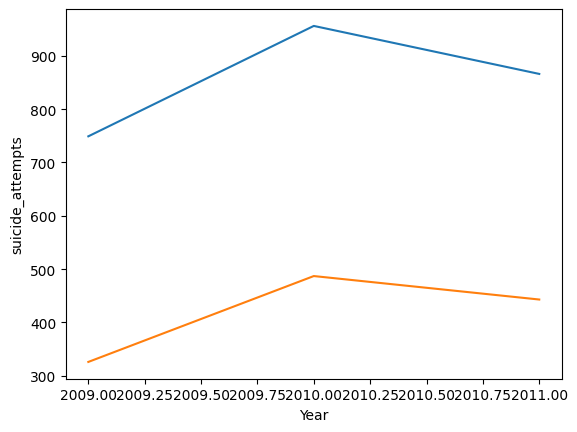

In [7]:
sb.lineplot(data = suicides_by_year, x = 'Year', y = 'suicide_attempts')
sb.lineplot(data = suicides_by_year, x = 'Year', y = 'Died')

Year 2010 witnessed the most suicide attempts and most deaths too¶

## Common Methods Of Committing Suicides

In [8]:
suicide_method = pd.DataFrame(suicides['method'].value_counts()
    ).reset_index().rename(columns = {'index': "method", 'method': 'total'})
suicide_method

,method,total
0,Pesticide,1768
1,Hanging,431
2,Other poison,146
3,Poison unspec,107
4,unspecified,48
5,Cutting,29
6,Drowning,26
7,Jumping,15
8,Others,1


In [9]:
px.pie(data_frame = suicide_method, names = 'method', values = 'total')

Clearly consuming "Pesticides" is the most common way, followed by "Hanging"

## Suicides by Area Type

<Axes: xlabel='Urban', ylabel='count'>

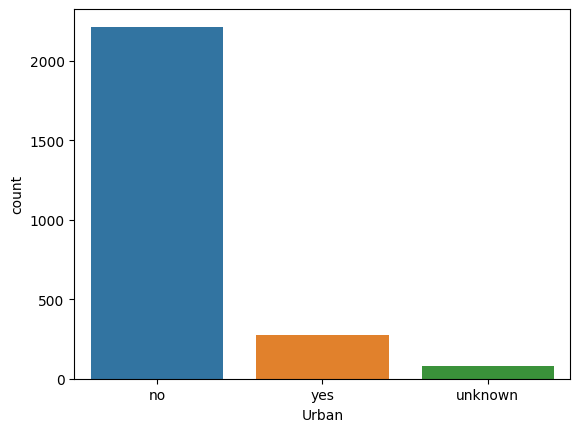

In [11]:
sb.countplot(data = suicides, x = 'Urban')

People living in the rural areas committed mosts suicides

In [12]:
def age_group(age):
    if age < 12:
        return "Children"
    elif age >= 13 and age <= 19:
        return "Teenagers"
    elif age >= 20 and age <= 35:
        return "Young Adults"
    elif age >= 36 and age <= 59:
        return "Middle Aged Adults"
    else:
        return "Senior Citizens"

suicides['Age Group'] = suicides['Age'].apply(age_group)

## Cases by Age Group and Gender

<Axes: xlabel='Age Group', ylabel='count'>

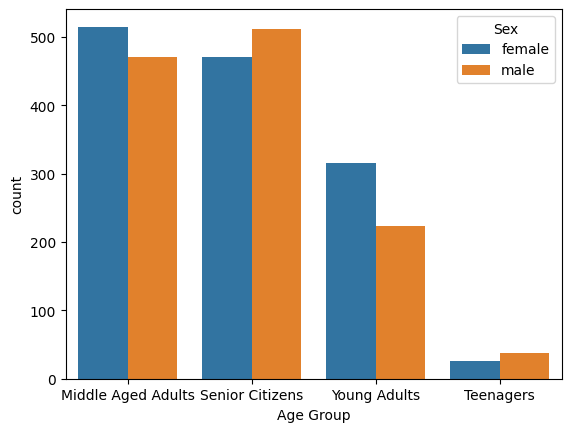

In [13]:
sb.countplot(data = suicides, x = 'Age Group', hue = 'Sex')

Middle Aged People and Senior People were almost equal in number in terms of suicide cases.

## Whether the victim died or lived

<Axes: xlabel='Died', ylabel='count'>

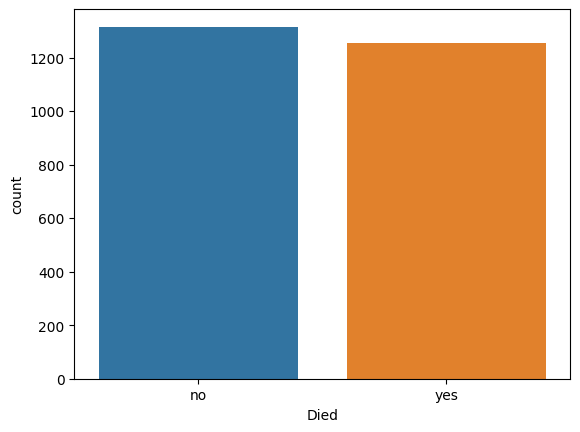

In [15]:
sb.countplot(data = suicides, x = 'Died',)

Number of people survived is slightly larger then people who died.

## Suicides Cases By Occupation

In [16]:
suicides_by_occupation = pd.DataFrame(suicides['Occupation'].value_counts()
                        ).reset_index().rename(columns = {'index': 'occupation', 'Occupation': 'suicides'})
suicides_by_occupation

,occupation,suicides
0,farming,2032
1,household,248
2,others/unknown,156
3,professional,37
4,student,35
5,unemployed,30
6,business/service,21
7,worker,6
8,others,3
9,retiree,3


In [17]:
px.pie(data_frame = suicides_by_occupation.head(5), names = 'occupation', values = 'suicides')

Farmers committed the most suicides and this is now evident why "Pesticides" was the most common means to attempt suicides.

## How does Education Level play a role in Suicidal cases.

<Axes: xlabel='Education', ylabel='count'>

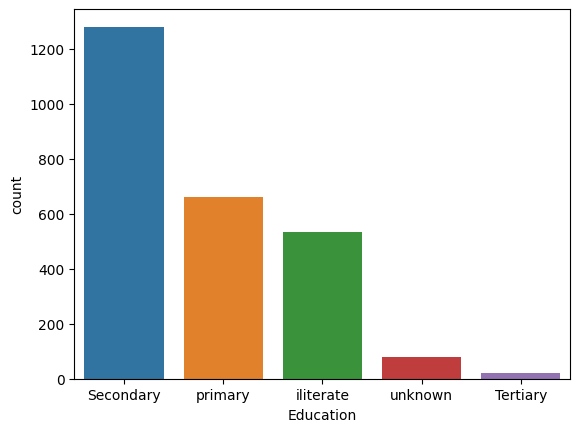

In [18]:
sb.countplot(data = suicides, x = 'Education')

This is quite astonishing that illiterate people have committed less suicides than the educated ones.